In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [3]:
df=pd.read_excel('/Users/saiprakashlikky/Desktop/Projects/ML_projects/Flight_Fare_estimator_Project/Data/Data_Train.xlsx')

In [4]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

### Explaing about the Data 

Airline                    -- Name of the Airline <br>
Date_of_journey            -- Journey_data<br>
source                     -- Starting place of journey<br>
Destination                -- End place of journey<br>
Route                      -- Route followed in journey<br>
Dep_time                   -- Depature Time<br>
Arrival_time               -- Arrival_time<br>
Duration                   -- Duration of the Journey<br>
Total_stops                -- Total stops for the journey<br>
Additional_info            -- Any comments or addtional information of the journey<br>
Price                      -- Price of the trip our Target Variable<br>

## Stage 1 Data Exploration

In [5]:
df.shape

(10683, 11)

In [6]:
df.describe(include="all")

Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4537        4537             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10683        10683    10683       10682           10683   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8345   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10683.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.064121  
std      4611.359167  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

#### Numerical features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We have few variables with incorrect data types 

In [8]:
def change_data_type(df, columns, change_type):
    for column in columns:
        if change_type == 'int':
            df[column] = df[column].astype(int)
        elif change_type == 'float':
            df[column] = df[column].astype(float)
        elif change_type == 'object':
            df[column] = df[column].astype(object)
        elif change_type == 'datetime':
            df[column] = pd.to_datetime(df[column], errors='coerce')

In [9]:
date_columns=["Date_of_Journey","Arrival_Time","Dep_Time"]
change_data_type(df,date_columns,'datetime')

In [10]:
df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-11-29 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-11-29 05:50:00 2023-11-29 13:15:00   7h 25m     2 stops   
2 2023-11-29 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-11-29 18:05:00 2023-11-29 23:30:00   5h 25m      1 stop   
4 2023-11-29 16:50:00 2023-11-29 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  
0         No info   3897  
1         No info   7662  
2         No info  13882  
3         No info   6218  
4         No info  13302

If we observe we have got arrival_time and dep_time as current experiment date we can leave that as it is as we extract hour and minutes and drop the respective columns

In [11]:
df["Month_of_journey"]=df.Date_of_Journey.dt.month
df["date_of_journey"]=df.Date_of_Journey.dt.day

In [12]:
def extract_hour(data,cols):
    for col in cols:
        df[col+"_hour"]=df[col].dt.hour

def extract_min(data,cols):
    for col in cols:
        df[col+"_min"]=df[col].dt.minute

In [13]:
extract_hour(df,['Arrival_Time','Dep_Time'])

In [14]:
extract_min(df,['Arrival_Time','Dep_Time'])

Let's all also convert Duratio into minutes so it becomes easy to analyse

In [15]:
def duration_to_minutes(duration):
    parts = duration.strip().split()
    hours = 0
    minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

df['Duration_minutes'] = df['Duration'].apply(duration_to_minutes)

df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2023-11-29 22:20:00 2023-03-22 01:10:00   2h 50m    non-stop   
1 2023-11-29 05:50:00 2023-11-29 13:15:00   7h 25m     2 stops   
2 2023-11-29 09:25:00 2023-06-10 04:25:00      19h     2 stops   
3 2023-11-29 18:05:00 2023-11-29 23:30:00   5h 25m      1 stop   
4 2023-11-29 16:50:00 2023-11-29 21:35:00   4h 45m      1 stop   

  Additional_Info  Price  Month_of_journey  date_of_journey  \
0         No info   3897                 3               24   
1         No info   7662                 5                1   
2         No info  13882                 6                9   
3         No info   6218                 5               12   
4         No info  13302                 3                1   

   Arrival_Time_hour  Dep_Time_hour  Arrival_Time_min  Dep_Time_min  \
0                  1             22                10            20   
1                 13              5                15            50   
2                  4              9                25            25   
3                 23             18                30             5   
4                 21             16                35            50   

   Duration_minutes  
0               170  
1               445  
2              1140  
3               325  
4               285

In [16]:
df.drop(['Duration','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [17]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [18]:
df.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Month_of_journey  date_of_journey  \
0         No info   3897                 3               24   
1         No info   7662                 5                1   
2         No info  13882                 6                9   
3         No info   6218                 5               12   
4         No info  13302                 3                1   

   Arrival_Time_hour  Dep_Time_hour  Arrival_Time_min  Dep_Time_min  \
0                  1             22                10            20   
1                 13              5                15            50   
2                  4              9                25            25   
3                 23             18                30             5   
4                 21             16                35            50   

   Duration_minutes  
0               170  
1               445  
2              1140  
3               325  
4               285

Now lets differenciate numerical and categorical vaiables

Now we can drop the other columns which we have extarcted the info

In [19]:
categorical_variables=[x for x in df.columns if df[x].dtype=='O']
numerical_variables=[x for x in df.columns if df[x].dtype=='int64']

In [20]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [21]:
numerical_variables

['Price', 'Duration_minutes']

### checking Missing values

In [22]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          1
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

we just have few missing values

## Checking Outliers

Let's see our target avriable has some outliers or not 

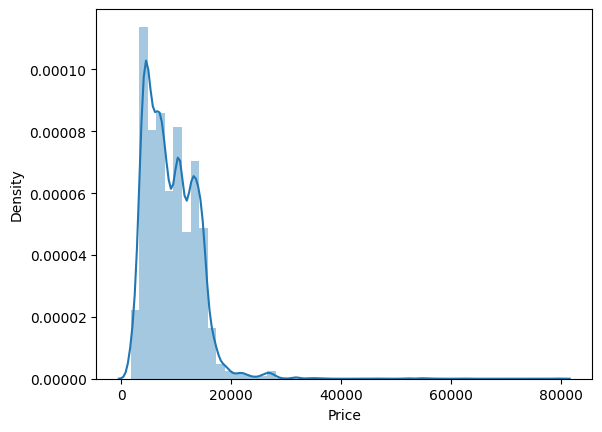

In [23]:
sns.distplot(df['Price'],label="price")
plt.show()

<Axes: ylabel='Price'>

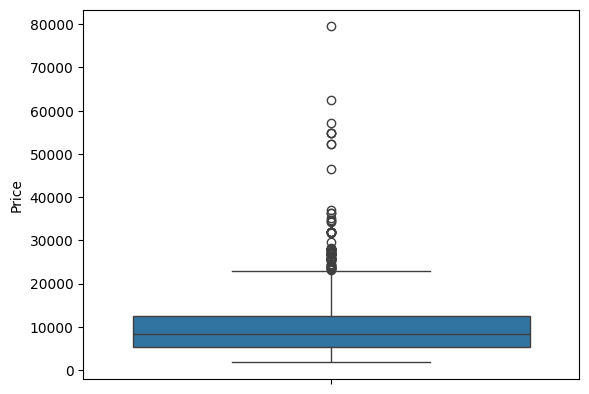

In [24]:
sns.boxplot(df['Price'])

### Numerical and Ctegorical Feature Analysis

#### Airline

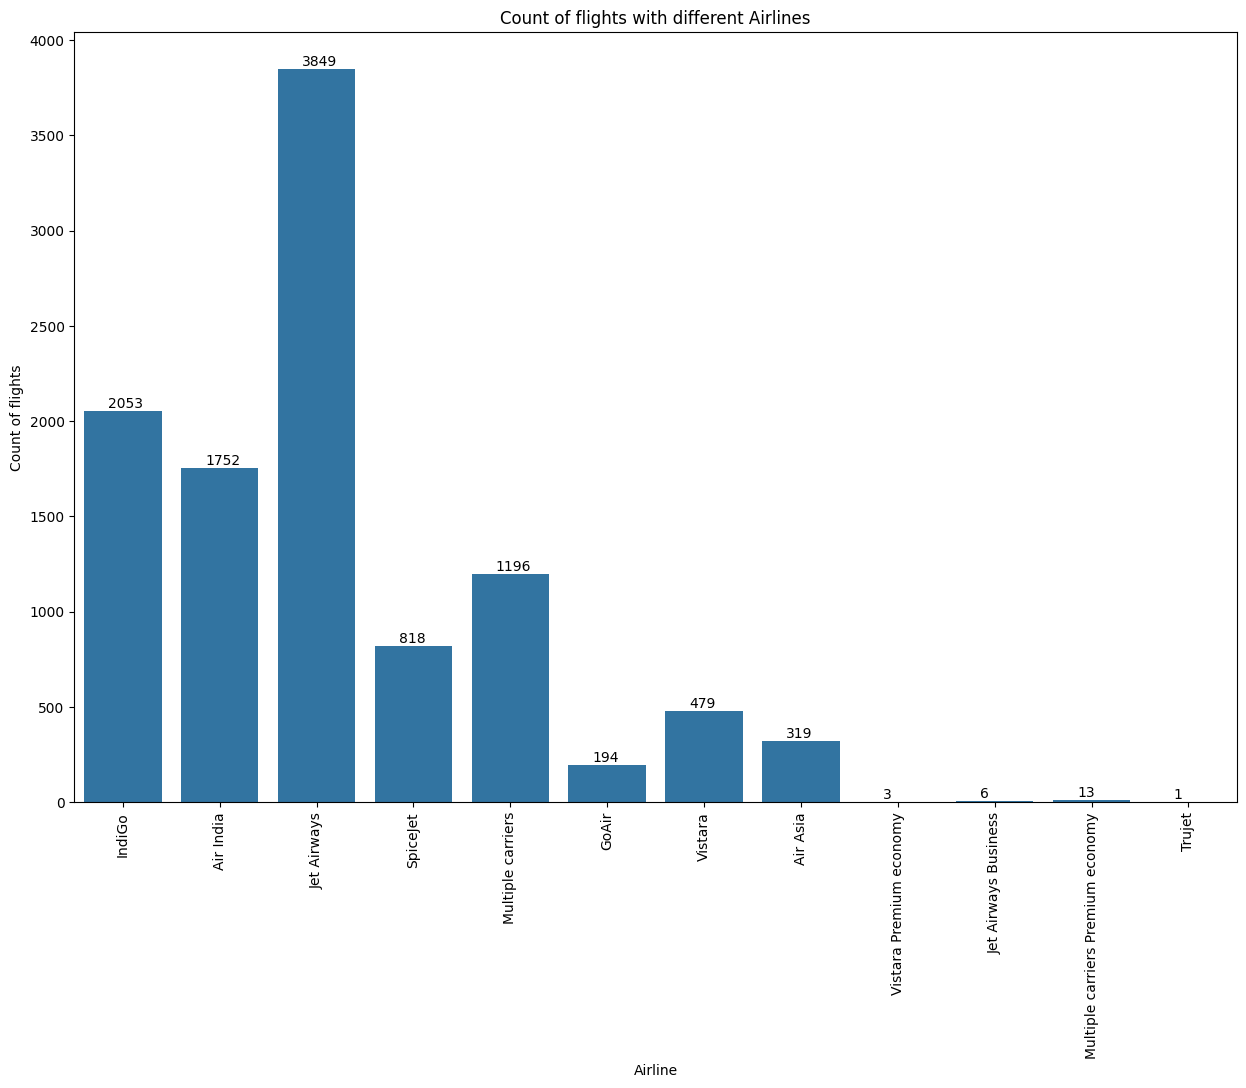

In [25]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

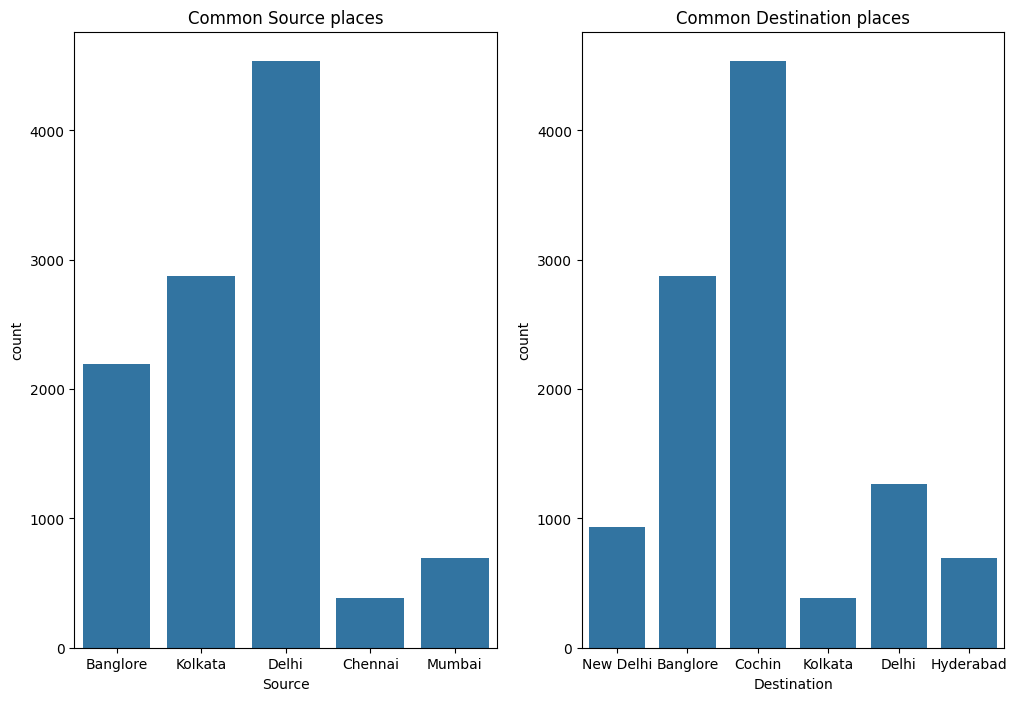

In [26]:
fig,axes=plt.subplots(1,2,figsize=(12,8))

sns.countplot(x=df["Source"],ax=axes[0])
axes[0].set_title("Common Source places")

sns.countplot(x=df['Destination'],ax=axes[1])
axes[1].set_title("Common Destination places")

plt.show()

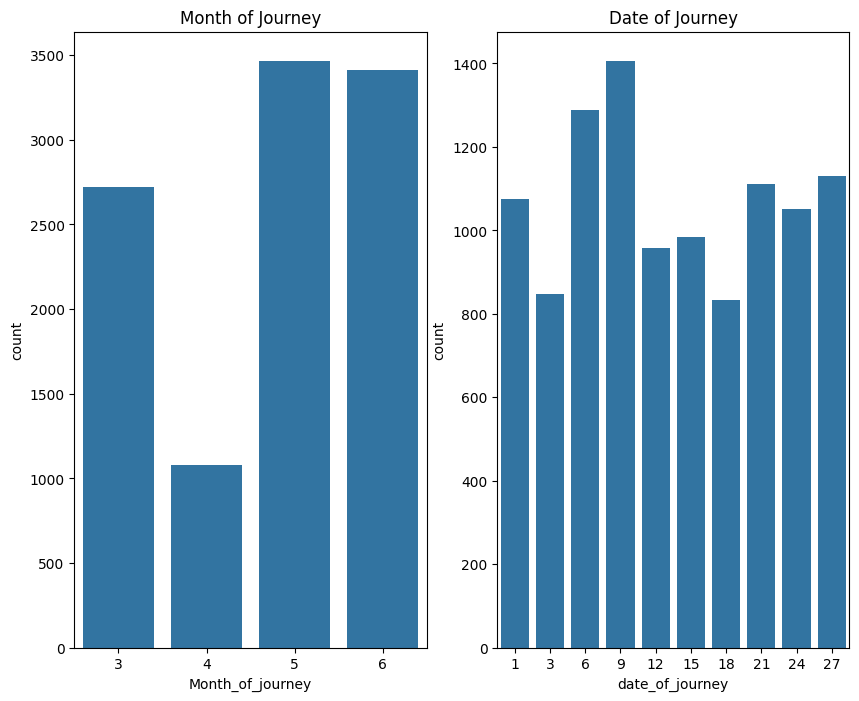

In [27]:
fig,axes=plt.subplots(1,2,figsize=(10,8))

sns.countplot(x=df["Month_of_journey"],ax=axes[0])
axes[0].set_title("Month of Journey")

sns.countplot(x=df['date_of_journey'],ax=axes[1])
axes[1].set_title("Date of Journey")

plt.show()

### Vs Price Analysis

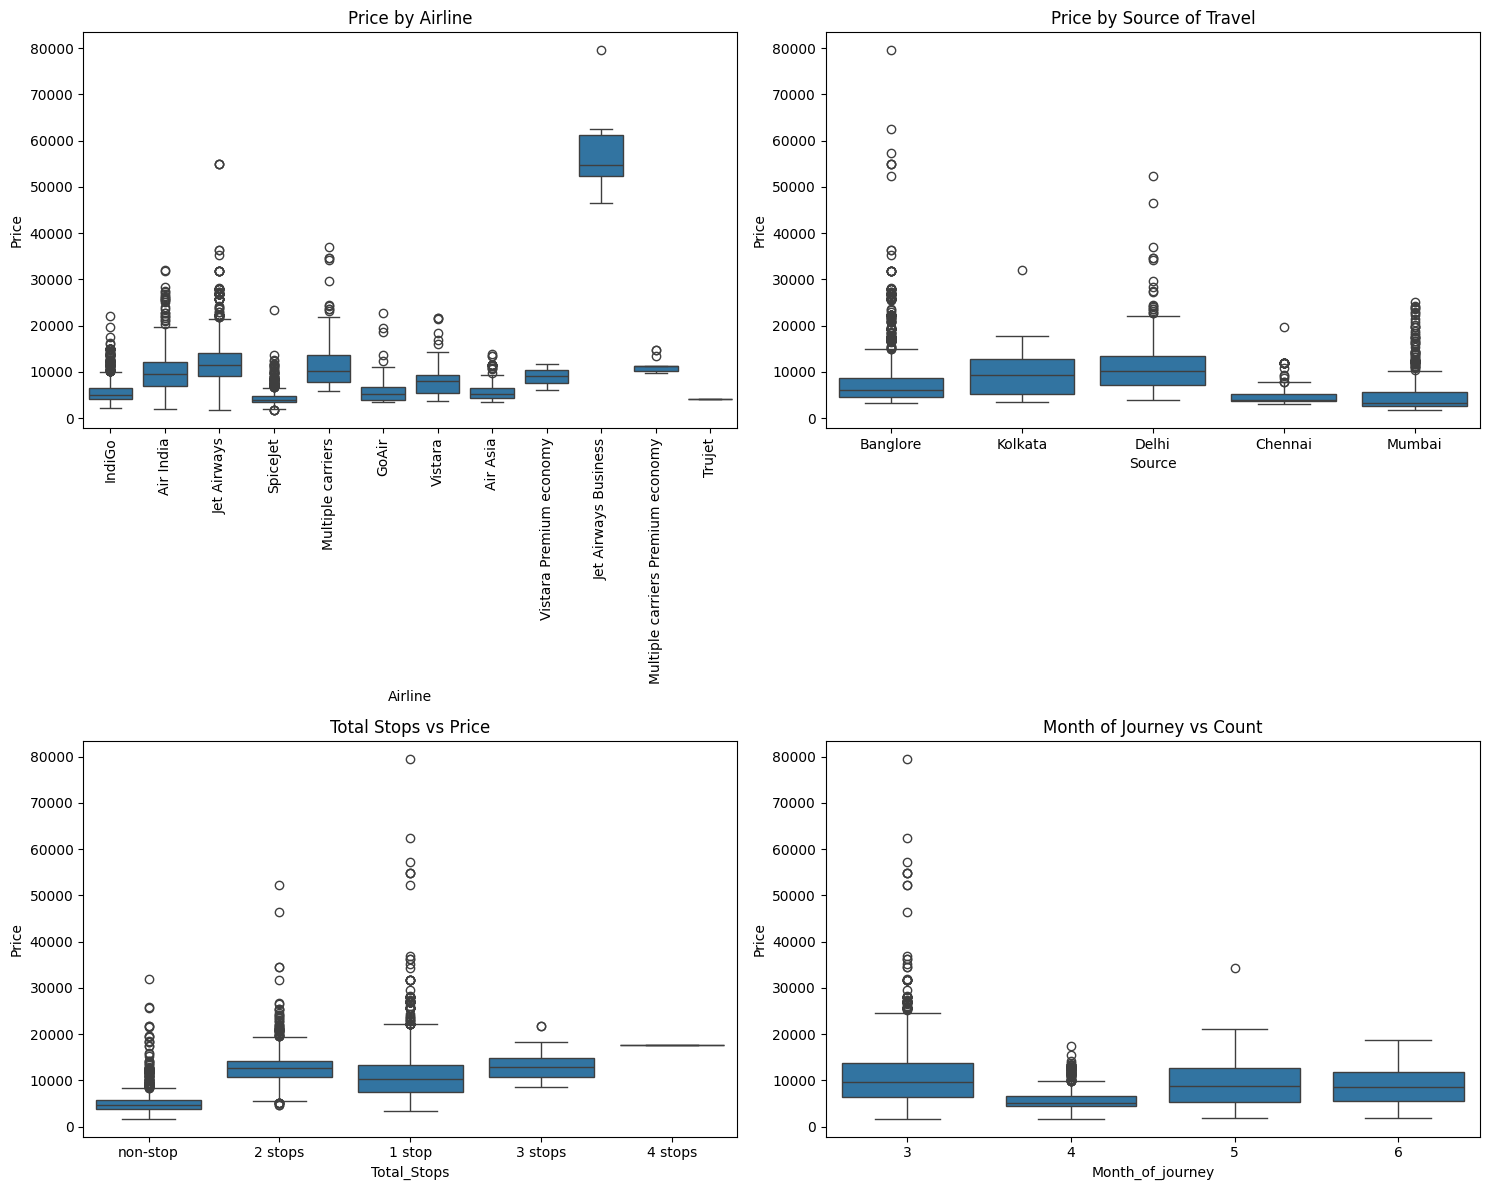

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot for 'Airline'
sns.boxplot(x='Airline', y='Price', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Price by Airline")
axes[0, 0].set_xlabel('Airline')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=90)

# Boxplot for 'Source'
sns.boxplot(x='Source', y='Price', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Price by Source of Travel")

# Boxplot for 'Total_Stops'
sns.boxplot(x='Total_Stops', y='Price', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Total Stops vs Price")

# Countplot for 'Month_of_journey'
sns.boxplot(x='Month_of_journey', y='Price', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Month of Journey vs Count")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Now Let's try to Handling Missng values Outliers 

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Total_Stops          0
Additional_Info      0
Price                0
Month_of_journey     0
date_of_journey      0
Arrival_Time_hour    0
Dep_Time_hour        0
Arrival_Time_min     0
Dep_Time_min         0
Duration_minutes     0
dtype: int64

### Outlier correction in Target varaible

In [31]:
df.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [32]:
df.Price.median()

8372.0

In [33]:
# Calculate the IQR
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bridges
lower_bridge = Q1 - (IQR * 1.5)
upper_bridge = Q3 + (IQR * 1.5)

print("Lower Bridge:", lower_bridge)
print("Upper Bridge:", upper_bridge)

Lower Bridge: -5367.0
Upper Bridge: 23017.0


In [34]:
# Calculate the lower and upper bridges
lower_bridge_ = Q1 - (IQR * 3)
upper_bridge_ = Q3 + (IQR * 3)

print("Lower Bridge:", lower_bridge_)
print("Upper Bridge:", upper_bridge_)

Lower Bridge: -16011.0
Upper Bridge: 33661.0


In [35]:
df.loc[df['Price'] > upper_bridge_, 'Price']

396      36983
657      52229
1478     54826
2099     36235
2618     54826
2693     35185
2924     79512
5372     62427
5439     54826
5719     36235
6991     34273
7351     46490
7617     34503
8598     34608
9715     52285
10364    57209
Name: Price, dtype: int64

<Axes: xlabel='Price', ylabel='Density'>

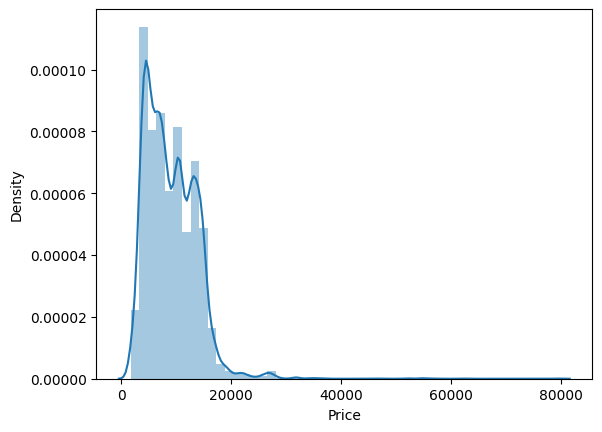

In [36]:
sns.distplot(df['Price'])

### Handling Categrocial variables

In [37]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_journey', 'date_of_journey',
       'Arrival_Time_hour', 'Dep_Time_hour', 'Arrival_Time_min',
       'Dep_Time_min', 'Duration_minutes'],
      dtype='object')

In [38]:
['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Month_of_Month_of_journey', 'day_of_date_of_journey',
       'Duration_minutes']

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'Month_of_Month_of_journey',
 'day_of_date_of_journey',
 'Duration_minutes']

In [39]:
df.drop(['Route','Additional_Info','Arrival_Time_hour', 'Dep_Time_hour', 'Arrival_Time_min',
       'Dep_Time_min'],axis=1,inplace=True)

In [40]:
categorical_variables

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [41]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Month_of_journey', 'date_of_journey', 'Duration_minutes'],
      dtype='object')

In [42]:
x = df.drop(columns=['Price'],axis=1)
y = df['Price']


In [43]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [44]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Month_of_journey',
       'date_of_journey', 'Duration_minutes'],
      dtype='object')

In [45]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns


In [46]:
num_features

Index(['Month_of_journey', 'date_of_journey', 'Duration_minutes'], dtype='object')

In [47]:
cat_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')

In [48]:
data_OHE = pd.concat([x[['Month_of_journey', 'date_of_journey', 'Duration_minutes']], # numerical variables 
                      pd.get_dummies(x.Airline),   # binary categorical variable
                      pd.get_dummies(x.Source, prefix='source'),  # with prefix for 'Source'
                      pd.get_dummies(x.Destination, prefix='destination'),  # with prefix for 'Destination'
                      pd.get_dummies(x.Total_Stops)], # k categories in categorical
                    axis=1)



In [49]:
data_OHE = data_OHE.astype(int)
data_OHE.head()


Month_of_journey  date_of_journey  Duration_minutes  Air Asia  Air India  \
0                 3               24               170         0          0   
1                 5                1               445         0          1   
2                 6                9              1140         0          0   
3                 5               12               325         0          0   
4                 3                1               285         0          0   

   GoAir  IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  ...  \
0      0       1            0                     0                  0  ...   
1      0       0            0                     0                  0  ...   
2      0       0            1                     0                  0  ...   
3      0       1            0                     0                  0  ...   
4      0       1            0                     0                  0  ...   

   destination_Cochin  destination_Delhi  destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   destination_Kolkata  destination_New Delhi  1 stop  2 stops  3 stops  \
0                    0                      1       0        0        0   
1                    0                      0       0        1        0   
2                    0                      0       0        1        0   
3                    0                      0       1        0        0   
4                    0                      1       1        0        0   

   4 stops  non-stop  
0        0         1  
1        0         0  
2        0         0  
3        0         0  
4        0         0  

[5 rows x 31 columns]

In [50]:
data_OHE.shape

(10682, 31)

In [51]:
import pickle

In [52]:
data_OHE.isnull().sum()

Month_of_journey                     0
date_of_journey                      0
Duration_minutes                     0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
source_Banglore                      0
source_Chennai                       0
source_Delhi                         0
source_Kolkata                       0
source_Mumbai                        0
destination_Banglore                 0
destination_Cochin                   0
destination_Delhi                    0
destination_Hyderabad                0
destination_Kolkata                  0
destination_New Delhi    

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming 'data_OHE' is your DataFrame
numerical_cols = ['Month_of_journey', 'date_of_journey', 'Duration_minutes']

# Extract numerical columns
numerical_data = data_OHE[numerical_cols]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a DataFrame with the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Ensure both DataFrames have the same index before concatenation
scaled_numerical_df.reset_index(drop=True, inplace=True)
data_OHE.reset_index(drop=True, inplace=True)

# Drop the original numerical columns from data_OHE
data_OHE.drop(columns=numerical_cols, inplace=True)

# Combine the scaled numerical data with the one-hot encoded categorical data
scaled_data_OHE = pd.concat([scaled_numerical_df, data_OHE], axis=1)

# Save the scaler object to a file using pickle
scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the scaler object from the file
with open(scaler_filename, 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Now you can use 'loaded_scaler' to transform new data

# Display the updated DataFrame with scaled numerical values
print(scaled_data_OHE.head())


   Month_of_journey  date_of_journey  Duration_minutes  Air Asia  Air India  \
0         -1.467402         1.237288         -0.931498         0          0   
1          0.250289        -1.475307         -0.389953         0          1   
2          1.109135        -0.531796          0.978679         0          0   
3          0.250289        -0.177979         -0.626263         0          0   
4         -1.467402        -1.475307         -0.705034         0          0   

   GoAir  IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  ...  \
0      0       1            0                     0                  0  ...   
1      0       0            0                     0                  0  ...   
2      0       0            1                     0                  0  ...   
3      0       1            0                     0                  0  ...   
4      0       1            0                     0                  0  ...   

   destination_Cochin  destination_Delhi  destinat

In [54]:
scaled_numerical_df.shape

(10682, 3)

In [55]:
scaled_data_OHE.shape

(10682, 31)

In [56]:
df.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [57]:
import pickle
import pandas as pd

# Load the StandardScaler object from the pickle file
scaler_filename = 'standard_scaler.pkl'
with open(scaler_filename, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Input data
input_data = {
    "Airline": "IndiGo",
    "Source": "Banglore",
    "Destination": "New Delhi",
    "Total_Stops": "non-stop",
    "Month_of_Month_of_journey": 3,
    "Day_of_Date_of_Journey": 24,
    "Duration_minutes": 170
}

# Mapping for Airlines
airlines = [
    'Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers',
    'SpiceJet', 'Vistara', 'Air Asia','GoAir', 'Multiple carriers Premium economy',
    'Jet Airways Business', 'Vistara Premium economy', 'Trujet'
]

# Create a list with one-hot encoded values for airlines
airline_list = [1 if input_data['Airline'] == airline else 0 for airline in airlines]
print(airline_list)

# Mapping for Sources
sources = ['Delhi', 'Kolkata', 'Banglore','Mumbai', 'Chennai']
source_list = [1 if input_data['Source'] == source else 0 for source in sources]
print(source_list)

# Mapping for Destinations
destinations = ['Cochin', 'Banglore','Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']
destination_list = [1 if input_data['Destination'] == destination else 0 for destination in destinations]
print(destination_list)

# Mapping for Total_Stops
stops_list = [1 if input_data['Total_Stops'] == stop else 0 for stop in ['1 stop','2 stops', '3 stops', '4 stops', 'non-stop']]
print(stops_list)

# Extract numerical values
numerical_values = [
    input_data['Month_of_Month_of_journey'],
    input_data['Day_of_Date_of_Journey'],
    input_data['Duration_minutes']
]

# Standardize numerical values
scaled_numerical_values = scaler.transform([numerical_values])

# Combine the scaled numerical values with the categorical values
scaled_input_data = scaled_numerical_values.tolist()[0] + airline_list + source_list + destination_list + stops_list

# Display the standardized input data
print(scaled_input_data)



[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1]
[-1.467402274302725, 1.2372875443930045, -0.9314977846815518, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [58]:
scaled_data_OHE.shape

(10682, 31)

In [59]:
scaled_data_OHE.isnull().sum()

Month_of_journey                     0
date_of_journey                      0
Duration_minutes                     0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
source_Banglore                      0
source_Chennai                       0
source_Delhi                         0
source_Kolkata                       0
source_Mumbai                        0
destination_Banglore                 0
destination_Cochin                   0
destination_Delhi                    0
destination_Hyderabad                0
destination_Kolkata                  0
destination_New Delhi    

In [60]:
scaled_data_OHE = scaled_data_OHE.fillna(0)  # Replace NaN with 0, you can choose a different value if needed

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_data_OHE,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((8545, 31), (2137, 31))

In [61]:
x_test.isnull().sum() # Replace NaN with 0, you can choose a different value if needed


Month_of_journey                     0
date_of_journey                      0
Duration_minutes                     0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
source_Banglore                      0
source_Chennai                       0
source_Delhi                         0
source_Kolkata                       0
source_Mumbai                        0
destination_Banglore                 0
destination_Cochin                   0
destination_Delhi                    0
destination_Hyderabad                0
destination_Kolkata                  0
destination_New Delhi    

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [63]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [66]:
y_test.isnull().sum()

0

In [67]:
x_test.isnull().sum()

Month_of_journey                     0
date_of_journey                      0
Duration_minutes                     0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
source_Banglore                      0
source_Chennai                       0
source_Delhi                         0
source_Kolkata                       0
source_Mumbai                        0
destination_Banglore                 0
destination_Cochin                   0
destination_Delhi                    0
destination_Hyderabad                0
destination_Kolkata                  0
destination_New Delhi    

In [68]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2819.3574
- Mean Absolute Error: 1954.0549
- R2 Score: 0.6249
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2848.1282
- Mean Absolute Error: 1968.8175
- R2 Score: 0.6238


Lasso
Model performance for Training set
- Root Mean Squared Error: 2819.7500
- Mean Absolute Error: 1953.6955
- R2 Score: 0.6248
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2853.0774
- Mean Absolute Error: 1968.8338
- R2 Score: 0.6225


Ridge
Model performance for Training set
- Root Mean Squared Error: 2824.1010
- Mean Absolute Error: 1955.0708
- R2 Score: 0.6236
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2854.7108
- Mean Absolute Error: 1973.2256
- R2 Score: 0.6221


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1264.8623
- Mean Absolute Error: 719.3828

In [69]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
4             XGBRegressor  0.818734
3  Random Forest Regressor  0.776247
0        Linear Regression  0.623791
1                    Lasso  0.622483
2                    Ridge  0.622050
5       AdaBoost Regressor  0.608068

In [72]:
print(scaled_input_data)

[-1.467402274302725, 1.2372875443930045, -0.9314977846815518, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pickle

# Define xgboost parameters
xgboost_params = {
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 6,
    'min_samples_split': 9,
    'n_estimators': 35
}

# Initialize XGBoost model with specified parameters
xg_model = XGBRegressor(fit_intercept=True, **xgboost_params)

# Train the model on the training data
xg_model = xg_model.fit(x_train, y_train)

# Save the model to a file using pickle
model_filename = 'model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(xg_model, model_file)

# Load the model from the file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Input data for prediction

# Reshape the input data for prediction
input_data = [scaled_input_data]

# Make predictions with the loaded model
y_pred = loaded_model.predict(input_data)

# Display the predicted value
print("Predicted Flight Fare:", y_pred[0])


Predicted Flight Fare: 10497.898


### The Above Code is Performed after performing Hyper paramaeter Tunning and taking best parameters Thos steps Have done below 

#### Hyper-Parameter Tunning

In [69]:
n_estimators = [int(x) for x in np.linspace(20, 250, 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, 10)]
min_samples_split = [2, 3, 5, 7, 9]  
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
} 

In [70]:
randomcv_models=[
    ('Random forest',RandomForestRegressor(),random_grid),
    ('XG boost',XGBRegressor(),random_grid)

]

In [122]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=25,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                             )
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"-------------------Best Params for {model_name}--------------")
    print(model_param[model_name]) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=45; total time=   0.2s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=45; total time=   0.2s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=45; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=45; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=45; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=45; total time=   0.4s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250; total time=   1.1s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=250; total time=   1.1s
[CV] END max_depth=80, max_features=sqrt, min_

/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=198; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=198; total time=   0.6s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=198; total time=   0.5s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=90, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=96; total time=   2.2s
[CV] END max_depth=90, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=96; total time=   2.2s
[CV] END max_depth=90, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=96; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   0.1s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   0.1s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=224; total time=   3.4s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   1.1s
[CV] END max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=224; total time=   3.5s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=147; total time=   2.9s
[CV] END max_depth=80, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=224; total time=   3.6s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   1.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=100, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=147; total time=   2.7s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=45; total time=   1.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   1.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   1.1s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=45; total time=   1.3s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=100, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=147; total time=   2.8s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=71; total time=   1.5s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=71; total time=   1.5s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=71; total time=   1.8s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   3.7s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=122; total time=   2.6s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=45; total time=   1.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   3.8s
[CV] END max_depth=60, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   4.1s
[CV] END max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=122; total time=   2.7s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=45; total time=   1.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=45; total time=   0.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=45; total time=   1.0s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=45; total time=   0.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=45; total time=   1.4s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=122; total time=   3.0s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=90, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=173; total time=   3.4s
[CV] END max_depth=90, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=173; total time=   3.5s
[CV] END max_depth=90, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=173; total time=   3.3s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=96; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=96; total time=   0.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=96; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=173; total time=   0.5s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=173; total time=   3.1s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=173; total time=   3.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=173; total time=   0.5s
[CV] END max_depth=70, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=173; total time=   3.3s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=173; total time=   0.5s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=198; total time=   3.6s
[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=198; total time=   3.3s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45; total time=   1.1s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=45; total time=   1.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=198; total time=   3.5s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=122; total time=   2.6s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=198; total time=   3.5s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   4.1s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   4.1s
[CV] END max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=198; total time=   3.5s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=250; total time=   4.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=198; total time=   3.6s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=122; total time=   2.5s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=45; total time=   1.0s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=122; total time=   2.5s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=45; total time=   1.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   3.0s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=45; total time=   1.0s
[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   3.2s


/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:11:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=173; total time=   3.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=173; total time=   3.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=173; total time=   2.8s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=173; total time=   3.0s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=198; total time=   2.0s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=198; total time=   2.0s
[CV] END max_depth=100, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=198; total time=   1.8s
-------------------Best Params for Random forest--------------
{'n_estimators': 173, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', '

Best Params for Random forest
{'n_estimators': 173, 
'min_samples_split': 9,
'min_samples_leaf': 1,
 'max_features': 'sqrt',
  'max_depth': 50}


  
Best Params for XG boost
{'n_estimators': 45, 
'min_samples_split': 9,
 'min_samples_leaf': 6, 
 'max_features': 'sqrt', 
 'max_depth': 10}

In [123]:
from sklearn.model_selection import GridSearchCV

# Define the grid search parameters based on the best parameters obtained
grid_search_params = {
    'Random forest': {
        'n_estimators': [150, 160, 170,180,190],  
        'max_features': ['sqrt'],
        'max_depth': [50],
        'min_samples_split': [9],
        'min_samples_leaf': [1]
    },
    'XG boost': {
        'n_estimators': [35,45,55,65,75],
        'max_features': ['sqrt'],
        'max_depth': [10],
        'min_samples_split': [9],
        'min_samples_leaf': [6]
    }
}

In [124]:

gridcv_models = [
    ('Random forest', RandomForestRegressor(), grid_search_params['Random forest']),
    ('XG boost', XGBRegressor(), grid_search_params['XG boost'])
]


In [125]:
grid_model_param = {}

for name, model, params in gridcv_models:
    grid = GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=3,
                        verbose=2,
                        n_jobs=-1
                        )
    grid.fit(x_train, y_train)
    grid_model_param[name] = grid.best_params_

# Print the results
for model_name in grid_model_param:
    print(f"-------------------Best Params for {model_name} (Grid Search)--------------")
    print(grid_model_param[model_name])


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=150; total time=   1.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=150; total time=   1.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=160; total time=   1.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=160; total time=   1.3s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=150; total time=   1.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=160; total time=   1.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=170; total time=   1.4s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=170;

/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160:

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=55; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=55; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=55; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=65; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=65; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=65; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=75; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=75; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_sa

/Users/saiprakashlikky/anaconda3/envs/venv/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [00:14:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


-------------------Best Params for Random forest (Grid Search)--------------
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 180}
-------------------Best Params for XG boost (Grid Search)--------------
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 35}


Best Params for Random forest (Grid Search)
{'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 20}



Best Params for XG boost (Grid Search)
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 122}

In [126]:
rf_params = {
    'max_depth': 50,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 9,
    'n_estimators': 180
}

xgb_params = {
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 6,
    'min_samples_split': 9,
    'n_estimators': 35
}

In [127]:
best_models = {
    "Random Forest Regressor": RandomForestRegressor(**rf_params),
    "XGBRegressor": XGBRegressor(**xgb_params)
}

In [128]:
model_list = []
r2_list = []

for model_name, model in best_models.items():
    model.fit(x_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1539.3302
- Mean Absolute Error: 1046.3706
- R2 Score: 0.8782
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2025.4491
- Mean Absolute Error: 1366.8516
- R2 Score: 0.8017


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1253.4693
- Mean Absolute Error: 832.7859
- R2 Score: 0.9192
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1997.3753
- Mean Absolute Error: 1299.0388
- R2 Score: 0.8071




In [129]:
best_model_index = np.argmax(r2_list)
best_model_name = list(best_models.keys())[best_model_index]
print(f"The best model based on R2 score is: {best_model_name}")

The best model based on R2 score is: XGBRegressor
